<h1> Project 2: The Dijkstra’s Algorithm </h1>

In the Dijkstra’s algorithm, the choice of the input graph representation and the priority 
queue implementation will affect its time complexity.

<b> (a) Suppose the input graph G = (V, E) is stored in an adjacency matrix and we use an array for the priority queue. Implement the Dijkstra’s algorithm using this setting  and  analyze  its  time  complexity  with  respect  to |V| and  |E| both theoretically and empirically. </b>

In [32]:
class GraphMatrix:
    def __init__(self, size):
        self.size = size
        self.matrix = [[0 for _ in range(size)] for _ in range(size)]
        self.numEdges = 0

    def __len__(self):
        return self.size
    
    def addEdge(self, start, end, cost):
        if (start < 0 or end < 0 or start >= self.size or end >= self.size):
            print("Invalid pair. Enter a number between 0 and {}.".format(self.size - 1))
            return False
        if start == end:
            print("Same vertex %d and %d" % (start, end))
        self.matrix[start][end] = cost
        self.numEdges += 1
        return True
    
    def removeEdge(self, start, end):
        if (start < 0 or end < 0 or start >= self.size or end >= self.size):
            print("Invalid pair. Enter a number between 0 and {}.".format(self.size - 1))
            return False
        if self.matrix[start][end] == 0:
            print("No edge between %d and %d." % (start, end))
            return False
        self.matrix[start][end] = 0
        self.numEdges -= 1
        return True
    
    def printGraph(self):
        print("Matrix: ")
        for i in range(self.size):
            print(self.matrix[i])

    def dijkstra_array(self, start):
        visited = [False] * self.size
        distance = [float('inf')] * self.size
        visited[start] = True
        distance[start] = 0
        
        for i in range(self.size):
            # Finds closest vertex to current node that is not yet visited.
            nearest = min(range(self.size), key = lambda x: float('inf') if visited[x] else distance[x])
            visited[nearest] = True

            for node in range(self.size):
                # 1. Edge exists && 2. Node not visited && 3. Total distance from start to chosen node is < current distance to node
                if self.matrix[nearest][node] > 0 and not visited[node] and (distance[nearest] + self.matrix[nearest][node] < distance[node]):
                    distance[node] = distance[nearest] + self.matrix[nearest][node]
            
        return distance

'''graph = GraphMatrix(5)
graph.addEdge(0, 1, 2)
graph.addEdge(0, 2, 3)
graph.addEdge(2, 4, 8)
graph.addEdge(0, 3, 9)
graph.addEdge(1, 2, 1)
graph.printGraph()
print("Distance: " + str(graph.dijkstra_array(0)))
graph.removeEdge(2, 4)
print("Distance: " + str(graph.dijkstra_array(0)))'''

'graph = GraphMatrix(5)\ngraph.addEdge(0, 1, 2)\ngraph.addEdge(0, 2, 3)\ngraph.addEdge(2, 4, 8)\ngraph.addEdge(0, 3, 9)\ngraph.addEdge(1, 2, 1)\ngraph.printGraph()\nprint("Distance: " + str(graph.dijkstra_array(0)))\ngraph.removeEdge(2, 4)\nprint("Distance: " + str(graph.dijkstra_array(0)))'

<b> Empirical Testing </b>

Same vertex 77 and 77
Same vertex 95 and 95
Same vertex 159 and 159
Same vertex 231 and 231
Same vertex 148 and 148
Same vertex 582 and 582
Same vertex 411 and 411
Same vertex 670 and 670
Same vertex 7 and 7
Same vertex 9 and 9
Same vertex 20 and 20
Same vertex 29 and 29
Same vertex 79 and 79
Same vertex 59 and 59
Same vertex 85 and 85
Same vertex 167 and 167
Same vertex 239 and 239
Same vertex 133 and 133
Same vertex 199 and 199
Same vertex 342 and 342
Same vertex 669 and 669
Same vertex 723 and 723
Same vertex 3 and 3
Same vertex 979 and 979
Same vertex 1150 and 1150
Same vertex 548 and 548
Same vertex 1150 and 1150
Same vertex 1321 and 1321
Same vertex 185 and 185
Same vertex 404 and 404
Same vertex 2 and 2
Same vertex 2 and 2
Same vertex 4 and 4
Same vertex 6 and 6
Same vertex 6 and 6
Same vertex 8 and 8
Same vertex 8 and 8
Same vertex 26 and 26
Same vertex 6 and 6
Same vertex 56 and 56
Same vertex 35 and 35
Same vertex 131 and 131
Same vertex 48 and 48
Same vertex 195 and 195
Same

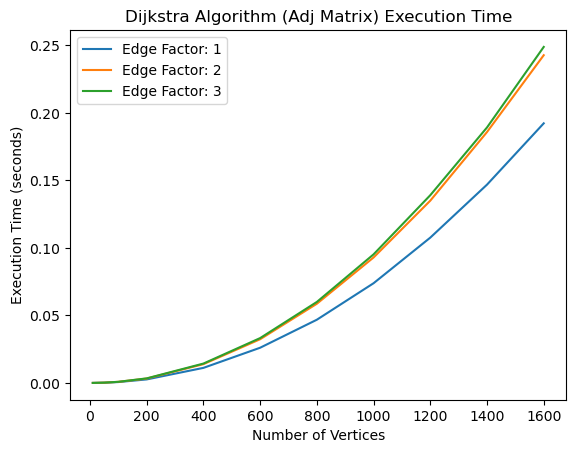

{1: [2.0990371704101564e-05,
  0.00018238544464111329,
  0.0006707239151000976,
  0.002623720169067383,
  0.011164822578430177,
  0.026080760955810547,
  0.04682365894317627,
  0.07385767936706543,
  0.10763043403625489,
  0.1468648862838745,
  0.19226091384887695],
 2: [2.22015380859375e-05,
  0.00021511077880859375,
  0.0008211612701416015,
  0.003260316848754883,
  0.013921017646789552,
  0.0323766565322876,
  0.058656229972839355,
  0.09292560577392578,
  0.13500018119812013,
  0.1858202600479126,
  0.2427129077911377],
 3: [2.3703575134277344e-05,
  0.00022143363952636719,
  0.000839390754699707,
  0.0033841562271118165,
  0.014357852935791015,
  0.0332219934463501,
  0.059998941421508786,
  0.09523152828216552,
  0.13904826641082763,
  0.18921710014343263,
  0.2488439464569092]}

In [36]:
import time
import random
import matplotlib.pyplot as plt

random.seed(1234)

def generate_random_graph_adjMatrix(num_vertices, edge_factor = 2):
    graph = GraphMatrix(num_vertices)
    for startNode in range(num_vertices):
        for _ in range(edge_factor):  # Average number of edges per vertex
            endNode = random.randint(0, num_vertices - 1)
            cost = random.randint(1, 10)
            graph.addEdge(startNode, endNode, cost)
    return graph

def measure_time_adjMatrix(graph, start_vertex=0):
    start_time = time.time()
    graph.dijkstra_array(start_vertex)
    end_time = time.time()
    return end_time - start_time

def empirical_test_adjMatrix(num_runs):
    vertices = [10, 50, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600]  # Different graph sizes to test
    edge_factors = [1 ,2, 3]  # Different edge factors to test
    average_times = {factor: [0] * len(vertices) for factor in edge_factors}
    
    # Summing times each run
    for run in range(num_runs):
        random.seed(run)
        for factor in edge_factors:
            for i, vertex in enumerate(vertices):
                graph = generate_random_graph_adjMatrix(vertex, factor)
                execution_time = measure_time_adjMatrix(graph)
                average_times[factor][i] += execution_time
                #print(f"Vertices: {v}, Edge Factor: {factor}, Time: {execution_time:.4f} seconds")

    # Calculating the average times
    for factor in edge_factors:
        for i in range(len(vertices)):
            average_times[factor][i] /= num_runs

    # Saving results to csv.
    with open("Average Results (Adj Matrix).csv", 'w') as file:
        header = 'Vertices,' + ','.join([str(factor) for factor in edge_factors]) + '\n'
        file.write(header)
        for i, v in enumerate(vertices):
            row = f"{v}," + ','.join([str(average_times[factor][i]) for factor in edge_factors]) + '\n'
            file.write(row)

    # Plotting
    for factor, execution_times in average_times.items():
        plt.plot(vertices, execution_times, label=f'Edge Factor: {factor}')
    plt.xlabel('Number of Vertices')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Dijkstra Algorithm (Adj Matrix) Execution Time')
    plt.legend()
    plt.show()

    return average_times

# Takes about 2 minutes
empirical_test_adjMatrix(50)

Manual Testing:

In [24]:
size = int(input("Enter a graph. What is the size of your graph (no. of vertices)?"))
graph = GraphMatrix(size)

while True:
    print("Choose an option: ")
    print("1: Print current Adjacency Matrix")
    print("2: Add an edge")
    print("3: Remove an edge")
    print("4: Solve using Djikstra (Adjacency Matrix)")
    print("5: Quit.")
    choice = int(input("Choice: "))

    match choice:
        case 1:
            graph.printGraph()
            print(" ")
        case 2:
            while True:
                edges = input("Input an edge connecting a pair of vertices (vertices start from 0): e.g. v1, v2, distance. Input -1 to exit.")
                edges = list(map(int, edges.split(",")))
                #print(edges, flush=True)
                if int(edges[0]) == -1:
                    print("Exitting.")
                    print(" ")
                    break
                if len(edges) != 3:
                    print("Invalid edge.")
                    print(" ")
                    continue
                else:
                    graph.addEdge(edges[0], edges[1], edges[2])
                    graph.printGraph()
                    print(" ")
        case 3:
            edges = input("Input an edge connecting a pair of vertices (vertices start from 0): e.g. v1, v2. Input -1 to exit.")
            edges = list(map(int, edges.split(",")))
            #print(edges, flush=True)
            if int(edges[0]) == -1:
                print("Exitting.")
                print(" ")
                pass
            if len(edges) != 2:
                print("Invalid edge.")
                print(" ")
                pass
            else:
                graph.removeEdge(edges[0], edges[1])
                graph.printGraph()
                print(" ")
        case 4:
            node = int(input("Enter starting node: "))
            print(graph.dijkstra_array(node))
            print(" ")
        case 5:
            print("Quitting.")
            break

Choose an option: 
1: Print current Adjacency Matrix
2: Add an edge
3: Remove an edge
4: Solve using Djikstra (Adjacency Matrix)
5: Quit.
Quitting.


<b> (b) Suppose the input graph G = (V, E) is stored in an array of adjacency lists and we  use  a  minimizing  heap  for  the  priority  queue.  Implement  the  Dijkstra’s algorithm using this setting and analyze its time complexity with respect to |V| and |E| both theoretically and empirically. </b>

In [58]:
# Minimzing Heap. Compares first val of tuples (Distance, Vertex), i.e. distance
class MinHeap:
    def __init__(self):
        self.heap = []

    # i is index of array and node.
    # Smallest Value (offsets of 1 due to zero indexing)
    def parent(self, i):
        return (i - 1) // 2

    def leftChild(self, i):
        return 2*i + 1

    def rightChild(self, i):
        return 2*i + 2

    def insert(self, value):
        self.heap.append(value)
        i = len(self.heap) - 1
        # Swapping parent and inserted item.
        while i != 0 and self.heap[self.parent(i)][0] > self.heap[i][0]:
            self.heap[i], self.heap[self.parent(i)] = self.heap[self.parent(i)], self.heap[i]
            i = self.parent(i)

    def heapify(self, i):
        l = self.leftChild(i)
        r = self.rightChild(i)
        smallest = i
        if l < len(self.heap) and self.heap[l][0] < self.heap[smallest][0]:
            smallest = l
        if r < len(self.heap) and self.heap[r][0] < self.heap[smallest][0]:
            smallest = r
        if smallest != i:
            self.heap[i], self.heap[smallest] = self.heap[smallest], self.heap[i]
            self.heapify(smallest)

    def extractMin(self):
        if len(self.heap) == 0:
            return None
        if len(self.heap) == 1:
            return self.heap.pop()
        minVal = self.heap[0][0]
        self.heap[0] = self.heap.pop() # Move the last element (largest) to the root
        self.heapify(0) # Restore the heap property
        return minVal

    def getMin(self):
        return self.heap[0] if self.heap else None

In [1]:
import heapq

# Adjacency List
class GraphList:
    class AdjNode:
        def __init__(self, value):
            self.vertex = value
            self.next = None
    
    def __init__(self, size):
        self.size = size
        self.numEdges = 0
        self.graph = [{} for _ in range(size)]

    # Add edges
    def addEdge(self, start, end, cost):
        #node = self.AdjNode(end)
        #node.next = self.graph[start]
        #self.graph[start] = node

        # Making use python dictionary instead of implementing own linked list. {Vertex : Distance}
        self.graph[start].update({end: cost})
        self.numEdges += 1
        return True

    def removeEdge(self, start, end):
        self.graph[start].pop(end)
        self.numEdges -= 1
        return True

    # Print the graph
    def printGraph(self):
        print("Adjacency List: Vertex (Distance)")
        for i in range(self.size):
            print("Vertex " + str(i) + ":", end="")
            nodes = self.graph[i]
            for key, value in nodes.items():
                print(" -> {} ({})".format(key, value), end="")
            print(" \n")

    def dijkstra_minheap(self, start):
        distances = [float('inf')] * self.size
        distances[start] = 0
        # Priority Queue: [(distance, index),..]
        priority_queue = [(0, start)]

        while priority_queue:
            # Take nearest vertex from start node.
            current_dist, current_vertex = heapq.heappop(priority_queue)

            # Remove outdated further distances in queue.
            if current_dist > distances[current_vertex]:
                continue

            for connectedNode, cost in self.graph[current_vertex].items():
                if current_dist + cost < distances[connectedNode]:
                    distances[connectedNode] = current_dist + cost
                    heapq.heappush(priority_queue, (distances[connectedNode], connectedNode))

        return distances

<b> Empirical Testing </b>

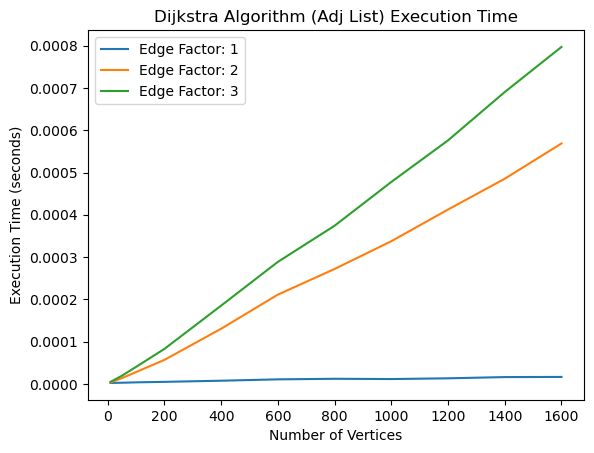

{1: [2.0599365234375e-06,
  2.493858337402344e-06,
  3.428459167480469e-06,
  4.591941833496094e-06,
  7.305145263671875e-06,
  1.0480880737304688e-05,
  1.1873245239257812e-05,
  1.1234283447265624e-05,
  1.2960433959960937e-05,
  1.5883445739746095e-05,
  1.6255378723144533e-05],
 2: [3.1948089599609376e-06,
  1.3437271118164062e-05,
  2.780437469482422e-05,
  5.666255950927734e-05,
  0.00013034343719482423,
  0.00021111011505126954,
  0.0002717924118041992,
  0.0003374624252319336,
  0.0004124641418457031,
  0.00048532962799072263,
  0.0005688095092773438],
 3: [4.563331604003906e-06,
  1.910686492919922e-05,
  4.0040016174316406e-05,
  8.264541625976562e-05,
  0.00018507957458496093,
  0.0002886009216308594,
  0.00037411689758300783,
  0.0004777383804321289,
  0.0005761432647705078,
  0.0006905603408813477,
  0.000797276496887207]}

In [35]:
import time
import random
import matplotlib.pyplot as plt

random.seed(1234)

def generate_random_graph_adjList(num_vertices, edge_factor = 2):
    graph = GraphList(num_vertices)
    for startNode in range(num_vertices):
        for _ in range(edge_factor):  # Average number of edges per vertex
            endNode = random.randint(0, num_vertices - 1)
            cost = random.randint(1, 10)
            graph.addEdge(startNode, endNode, cost)
    return graph

def measure_time_adjList(graph, start_vertex=0):
    start_time = time.time()
    graph.dijkstra_minheap(start_vertex)
    end_time = time.time()
    return end_time - start_time

def empirical_test_adjList(num_runs):
    vertices = [10, 50, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600]  # Different graph sizes to test
    edge_factors = [1 ,2, 3]  # Different edge factors to test
    average_times = {factor: [0] * len(vertices) for factor in edge_factors}
    
    # Summing times each run
    for run in range(num_runs):
        random.seed(run)
        for factor in edge_factors:
            for i, vertex in enumerate(vertices):
                graph = generate_random_graph_adjList(vertex, factor)
                execution_time = measure_time_adjList(graph)
                average_times[factor][i] += execution_time
                #print(f"Vertices: {v}, Edge Factor: {factor}, Time: {execution_time:.4f} seconds")

    # Calculating the average times
    for factor in edge_factors:
        for i in range(len(vertices)):
            average_times[factor][i] /= num_runs

    # Saving results to csv.
    with open("Average Results (Adj List).csv", 'w') as file:
        header = 'Vertices,' + ','.join([str(factor) for factor in edge_factors]) + '\n'
        file.write(header)
        for i, v in enumerate(vertices):
            row = f"{v}," + ','.join([str(average_times[factor][i]) for factor in edge_factors]) + '\n'
            file.write(row)

    # Plotting
    for factor, execution_times in average_times.items():
        plt.plot(vertices, execution_times, label=f'Edge Factor: {factor}')
    plt.xlabel('Number of Vertices')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Dijkstra Algorithm (Adj List) Execution Time')
    plt.legend()
    plt.show()

    return average_times

# Takes about 2s for me.
empirical_test_adjList(50)

Manual Testing:

In [57]:
size = int(input("Enter a graph. What is the size of your graph (no. of vertices)?"))
graph = GraphList(size)

while True:
    print("Choose an option: ")
    print("1: Print current Adjacency List")
    print("2: Add an edge")
    print("3: Remove an edge")
    print("4: Solve using Djikstra (Adjacency List)")
    print("5: Quit.")
    choice = int(input("Choice: "))

    match choice:
        case 1:
            graph.printGraph()
            print(" ")
        case 2:
            while True:
                edges = input("Input an edge connecting a pair of vertices (vertices start from 0): e.g. v1, v2, distance. Input -1 to exit.")
                edges = list(map(int, edges.split(",")))
                #print(edges, flush=True)
                if int(edges[0]) == -1:
                    print("Exitting.")
                    print(" ")
                    break
                if len(edges) != 3:
                    print("Invalid edge.")
                    print(" ")
                    continue
                else:
                    graph.addEdge(edges[0], edges[1], edges[2])
                    graph.printGraph()
                    print(" ")
        case 3:
            edges = input("Input an edge connecting a pair of vertices (vertices start from 0): e.g. v1, v2. Input -1 to exit.")
            edges = list(map(int, edges.split(",")))
            #print(edges, flush=True)
            if int(edges[0]) == -1:
                print("Exitting.")
                print(" ")
                pass
            if len(edges) != 2:
                print("Invalid edge.")
                print(" ")
                pass
            else:
                graph.removeEdge(edges[0], edges[1])
                graph.printGraph()
                print(" ")
        case 4:
            node = int(input("Enter starting node: "))
            print(graph.dijkstra_minheap(node))
            print(" ")
        case 5:
            print("Quitting.")
            break

Choose an option: 
1: Print current Adjacency List
2: Add an edge
3: Remove an edge
4: Solve using Djikstra (Adjacency List)
5: Quit.
Adjacency List: Vertex (Distance)
Vertex 0: 

Vertex 1: 

Vertex 2: 

Vertex 3: 

Vertex 4: 

 
Choose an option: 
1: Print current Adjacency List
2: Add an edge
3: Remove an edge
4: Solve using Djikstra (Adjacency List)
5: Quit.
Adjacency List: Vertex (Distance)
Vertex 0: -> 1 (2) 

Vertex 1: 

Vertex 2: 

Vertex 3: 

Vertex 4: 

 
Adjacency List: Vertex (Distance)
Vertex 0: -> 1 (2) -> 2 (3) 

Vertex 1: 

Vertex 2: 

Vertex 3: 

Vertex 4: 

 
Adjacency List: Vertex (Distance)
Vertex 0: -> 1 (2) -> 2 (3) -> 4 (100) 

Vertex 1: 

Vertex 2: 

Vertex 3: 

Vertex 4: 

 
Adjacency List: Vertex (Distance)
Vertex 0: -> 1 (2) -> 2 (3) -> 4 (100) -> 3 (10) 

Vertex 1: 

Vertex 2: 

Vertex 3: 

Vertex 4: 

 
Adjacency List: Vertex (Distance)
Vertex 0: -> 1 (2) -> 2 (3) -> 4 (100) -> 3 (10) 

Vertex 1: -> 2 (1) 

Vertex 2: 

Vertex 3: 

Vertex 4: 

 
Exitting.
 
C